# Lab | Cleaning numerical data

Context:

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
5. Change effective to date column to datetime format.
6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
7. Plot a correlation matrix, comment what you see.
8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)
9. Comment what you can see in the plots.
10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
11. Did you find outliers? Comment what you will do with them.
12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

### 1. Import the necessary libraries.

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [203]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [204]:
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [205]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [206]:
# no NaN-Values
round(customer_df.isna().sum()/len(customer_df),4)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [207]:
# standardize headers
customer_df.columns = [e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [208]:
### date/time format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [209]:
customer_df_num = customer_df.select_dtypes(np.number)
customer_df_cat = customer_df.select_dtypes(object)

In [210]:
customer_df['customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [211]:
customer_df['customer'].nunique()
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [212]:
def diff_continuous_discrete(df):   
    df_num = df.select_dtypes(np.number)
    
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df_num:
        if ((df_num[column].nunique()/len(df_num)*100) > 20):
            continuous_df = pd.concat([continuous_df, df_num[column]], axis = 1)
        else:
            discrete_df = pd.concat([discrete_df, df_num[column]], axis = 1)
    
    display(discrete_df.head())
    display(continuous_df.head())
    return discrete_df, continuous_df

discrete_df, continuous_df = diff_continuous_discrete(customer_df)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


### 7. Plot a correlation matrix, comment what you see.

In [213]:
corr_matrix = customer_df_num.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


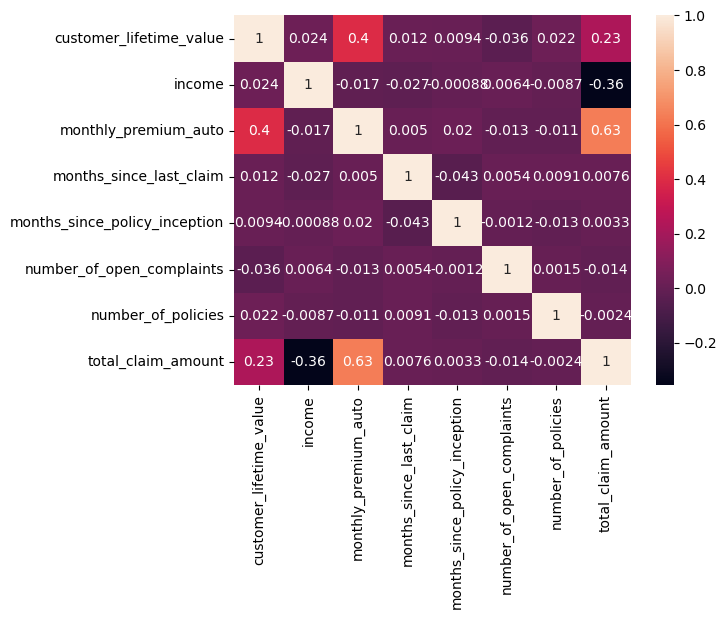

In [214]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

Based on the Correlations Index:

- 0.9 and 1.0 very highly correlated
- 0.7 and 0.9 highly correlated
- 0.5 and 0.7 moderately correlated
- 0.3 and 0.5 low correlation
- less than 0.3 little if any (linear) correlation. 

We can see that:
- total_claim_amount <> monthly_premium_auto        are moderately correlated (0.63)
- monthly_premium_auto <> customer_lifetime_value   are lowly correlated (0.4)
- total_claim_amount <> customer_lifetime_value     are lowly correlated (0.23) 
- total_claim_amount <> income                      are lowly correlated (-0.36)


### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [215]:
#def plot_discrete(discrete_df):
#    for column in discrete_df.columns:
#        plt.figure()
#        plt.title(column)
#        plt.hist(discrete_df[column])

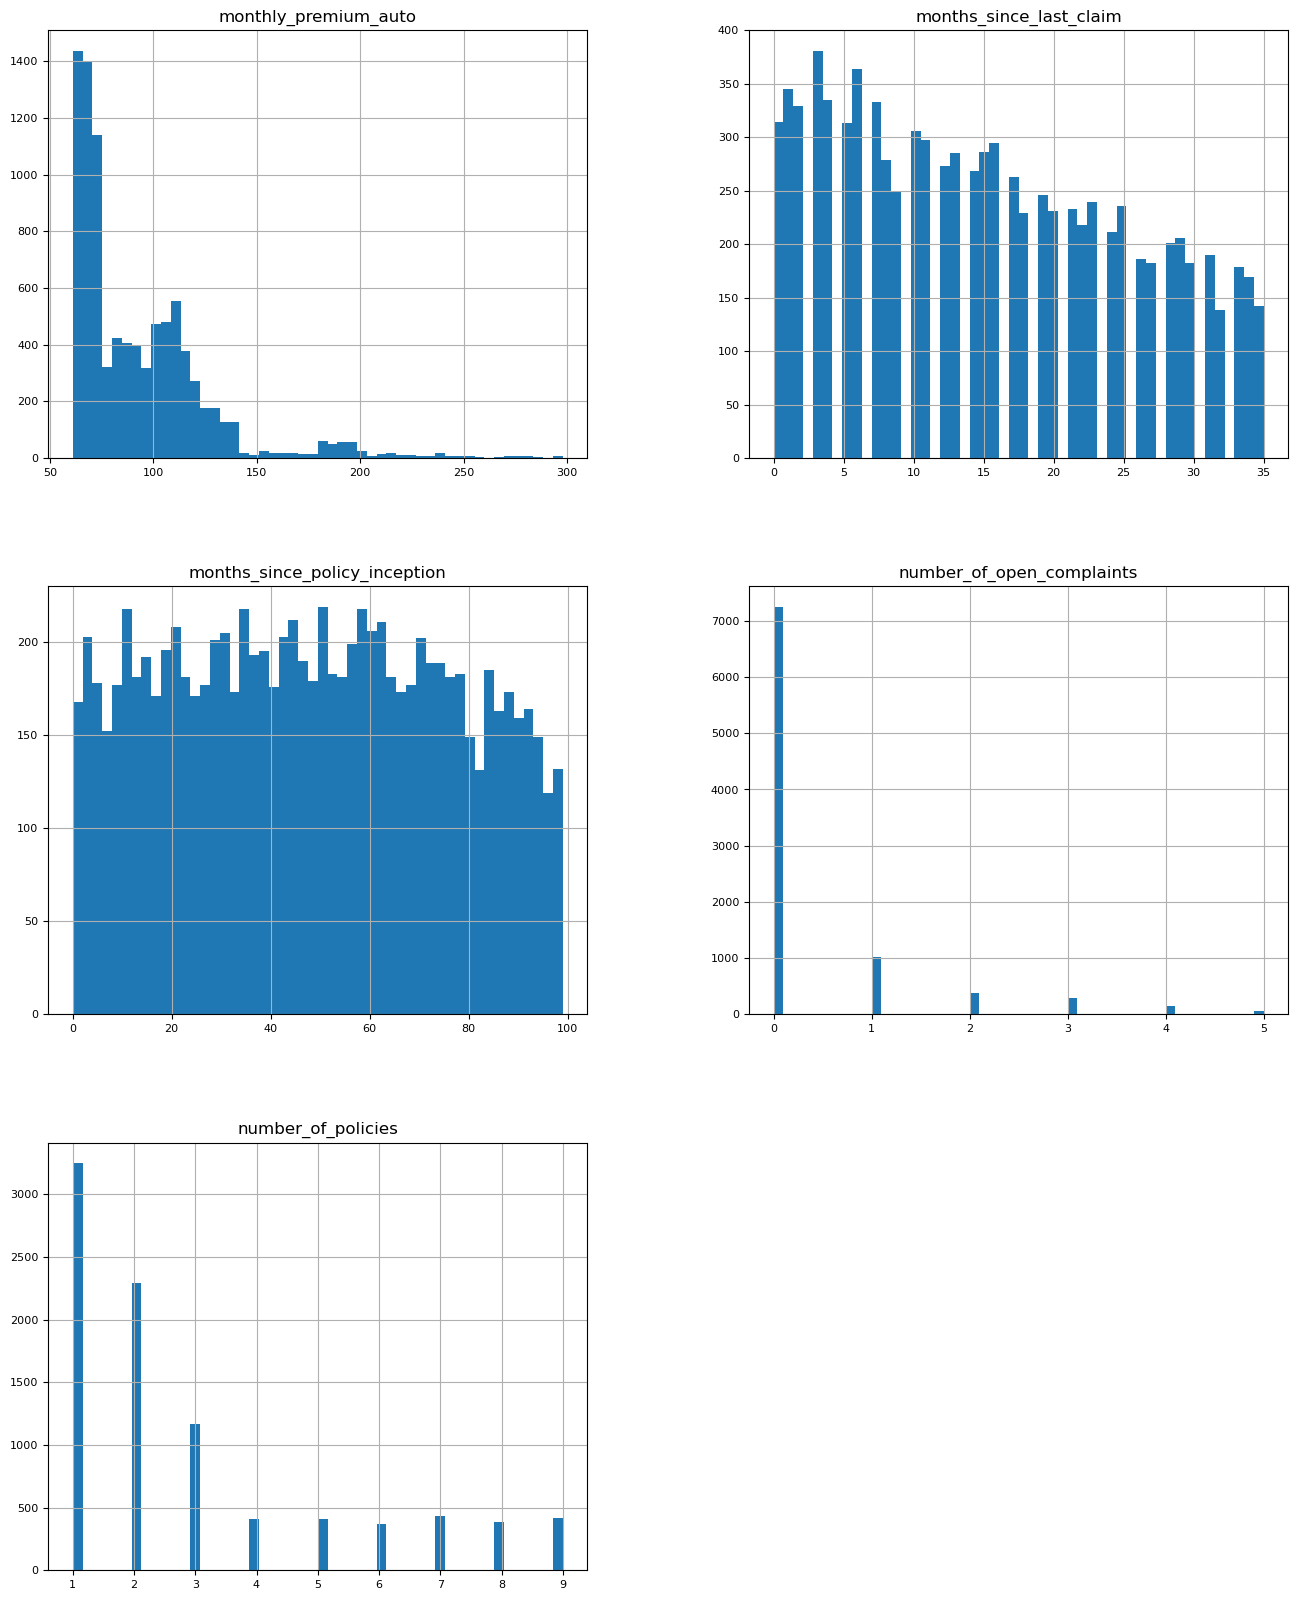

In [216]:
def plot_discrete(discrete_df):
    discrete_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
plot_discrete(discrete_df)

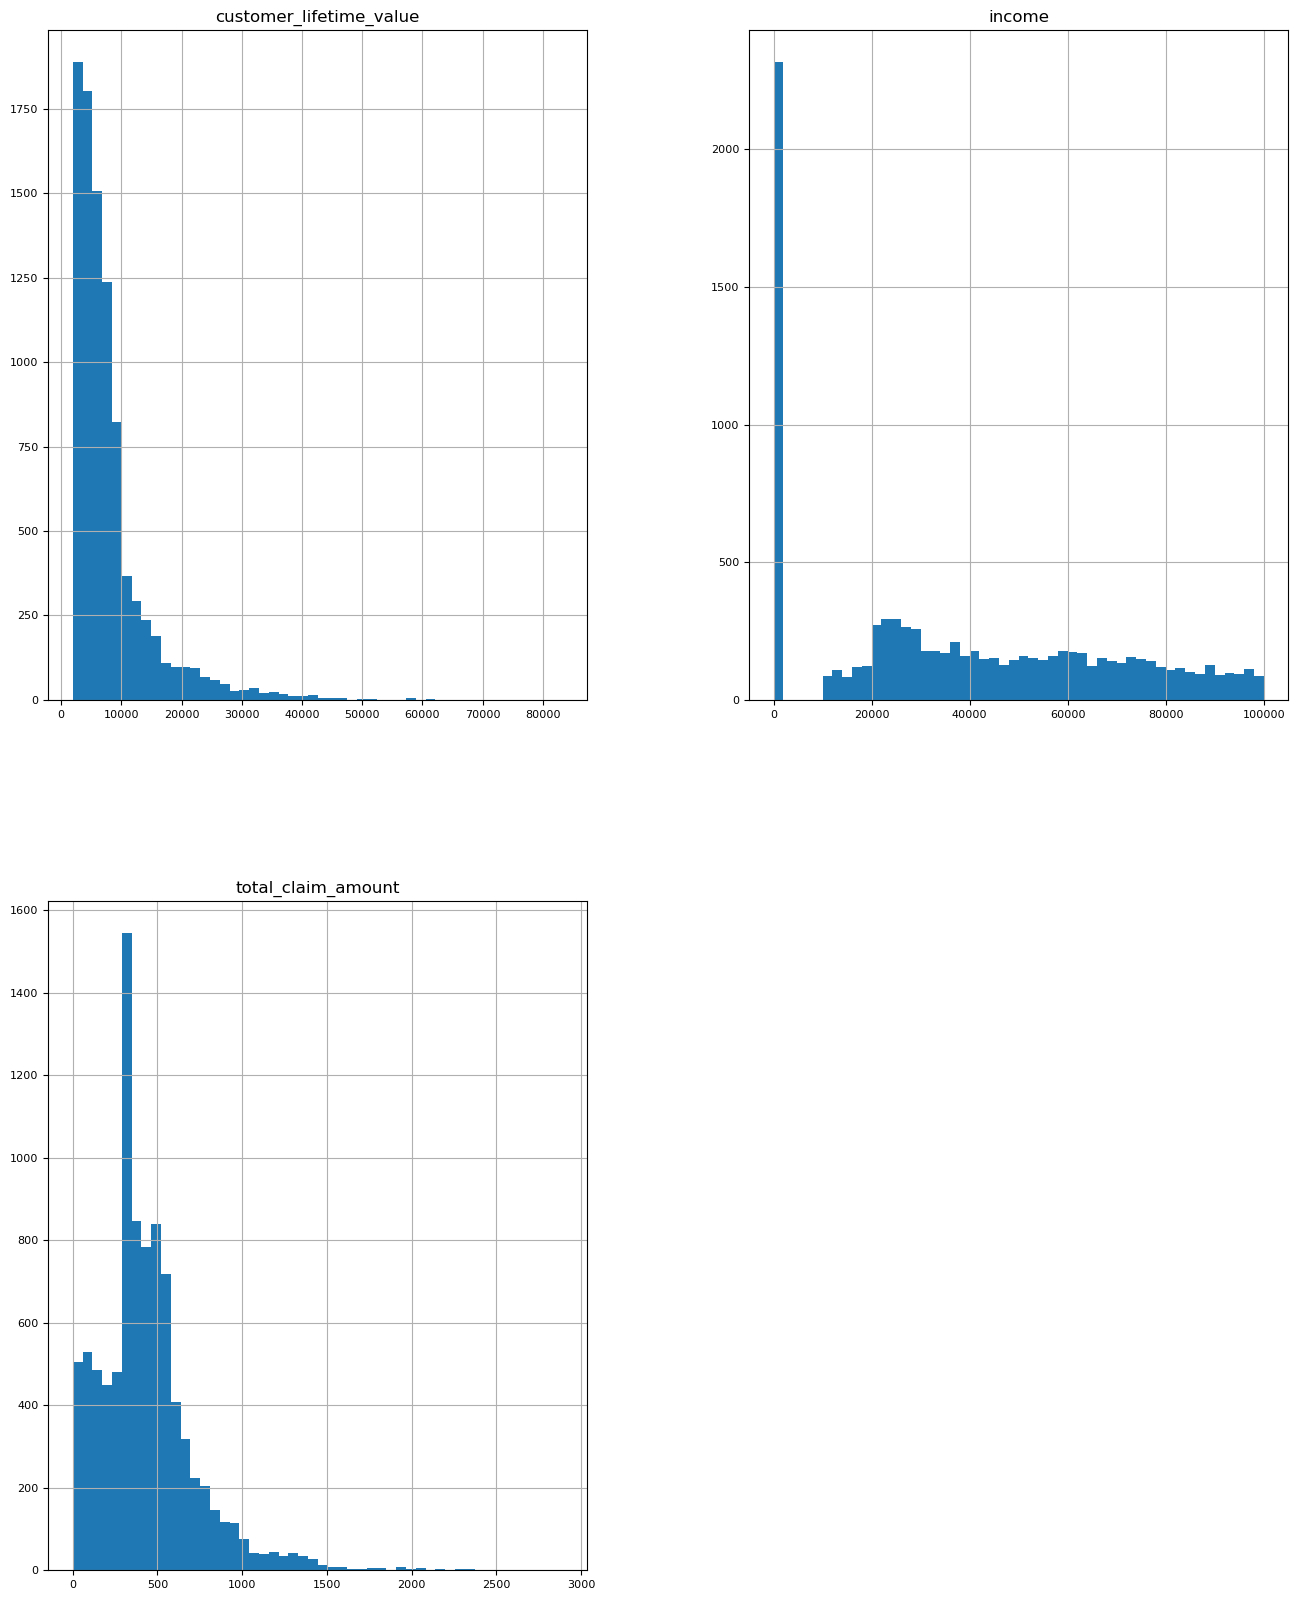

In [217]:
def plot_continuous(continuous_df):
    continuous_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plot_continuous(continuous_df)

### 9. Comment what you can see in the plots.

Discrete Variables:

- monthly_premium_auto: right-skewed distribution, range = [50 - 300], a lot of outliers from 200+
- months_since_last_claim: lightly right-skewed distribution, range = [0 - 35], no relevant outliers visible
- months_since_policy_inception: uniform distribution, range = [0 - 100], no relevant outliers visible
- number_of_open_complaints: strong right-skewed distribution (high amount of values in for the 0), range = [0 - 5], outliers (2-5 ?)
- number_of_policies: right-skewed distribution (high amount of values in for the 1), range = [1 - 9], no relevant outliers visible

Continuous Variables:

- customer_lifetime_value: strongly right-skewed distribution, range = [0 - 600'000], outliers at around 600'000.
- income: a very high amount of 0 income! 
- total_claim_amount: non-symmetric bimodal distribution, range = [0 - 2500], outliers from 1500+

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

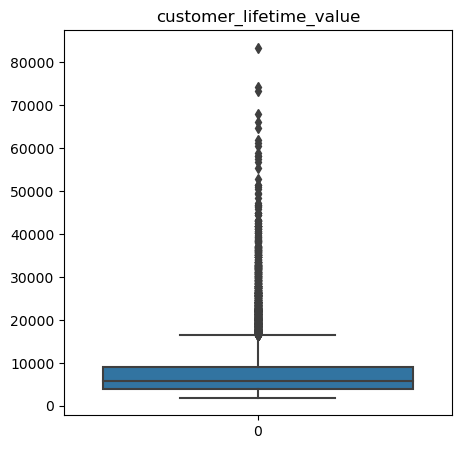

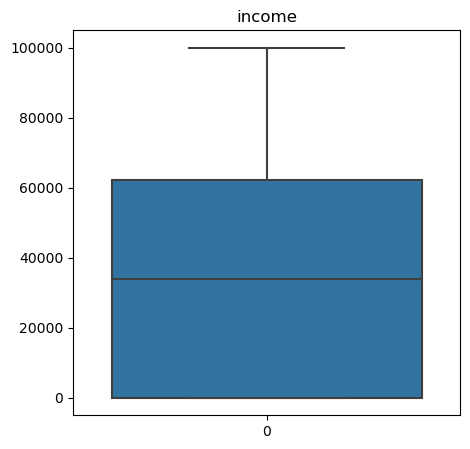

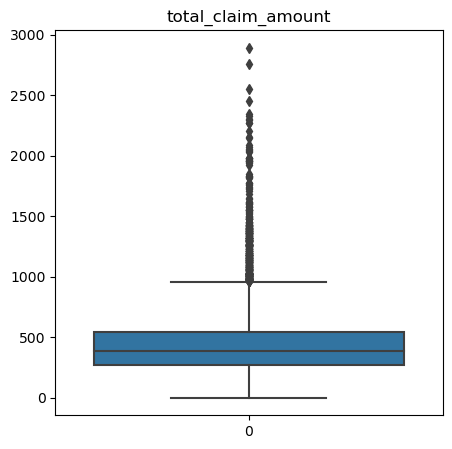

In [218]:
def plot_continuous_boxplot(continuous_df):
    for column in continuous_df.columns:
        plt.figure(figsize=(5, 5))
        plt.title(column)
        sns.boxplot(data=continuous_df[column])
plot_continuous_boxplot(continuous_df)

### 11. Did you find outliers? Comment what you will do with them.

Continuous Variables:
- customer_lifetime_value: there are some outliers, from around 60'000 upwards. If we were to remove the rows were the value is above 60'000, we would delete 9 rows, which is ok.
- income: no outliers
- total_claim_amount: some outliers, from around 2'000 upwards. If we were to remove the rows were the value is above 2'000, we would delete 19 rows, which is ok.

--> this means in total we would delete 28 rows from total 9134 rows.

In [219]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['customer_lifetime_value'],75) - np.nanpercentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['customer_lifetime_value'] > 60000] # We do a visual inspection and see that all the numbers over 200 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['customer_lifetime_value'] <= 60000]

16414.039911750002


In [220]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['total_claim_amount'],75) - np.nanpercentile(customer_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['total_claim_amount'] > 2000] # We do a visual inspection and see that all the numbers over 200 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['total_claim_amount'] <= 2000]

959.7071520000002


### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

Checked before! There are no NaN values.

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [221]:
# we did this already before
customer_df_cat

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 3. Check for NaN values.

In [222]:
# we already checked for NaN values before but here the code again, to confirm there are no NaNs.
customer_df_cat.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

### 4. Check all unique values of columns.

In [223]:
for column in customer_df_cat:
  print(column, customer_df_cat[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employment_status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


### 5. Check dtypes. Do they all make sense as categorical data?

### 6. Does any column contain alpha and numeric data? Decide how to clean it.

### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [224]:
customer_df_cat.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [225]:
for column in customer_df_cat:
    display(customer_df_cat[column].value_counts(dropna=False))


BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

- response: (Yes, No) --> change to boolean? 
- customer: dropping the column, because it is individual and doesn't help us.
- otherwise I wouldn't change anything at the moment.


In [226]:
customer_df_cat = customer_df_cat.drop('customer', axis=1)

In [227]:
customer_df_cat['response'] = (customer_df_cat.response == 'Yes')*1
customer_df_cat['response'] = customer_df_cat['response'].astype('bool')

In [228]:
customer_df_cat.dtypes

state                object
response               bool
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [229]:
customer_df_cat['policy_type'].value_counts()
#customer_df_cat['policy_type'] = np.where(customer_df_cat.policy_type.isin('Corporate*'),'other', data.STATE)


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [230]:
customer_df_cat['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [231]:
# we can drop policy type, since its value is duplicated in the policy column.
customer_df_cat = customer_df_cat.drop(['policy_type'],axis=1)

### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [232]:
for column in customer_df_cat:
    display(customer_df_cat[column].value_counts(dropna=False))

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

False    7826
True     1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

I wouldn't make any additional changes right now.